In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split,KFold
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.model_selection import learning_curve

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Activation
from scikeras.wrappers import KerasClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report


# 1. Data Preprocessing



## 1.1. Explaratory Data Analysis


In [2]:
### This code from the website which has the dataset we will use ###

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_original.data.features 
y = breast_cancer_wisconsin_original.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_original.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_original.variables) 


{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

In [3]:
display(X.head())
display(y.head())

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


,Class
0,2
1,2
2,2
3,2
4,2


In [4]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity_of_cell_size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity_of_cell_shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single_epithelial_cell_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Bare_nuclei,683.0,3.544656,3.643857,1.0,1.0,1.0,6.0,10.0
Bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 49.3 KB


In [6]:
X.isnull().sum()

Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
dtype: int64

16  missing value detecting in "Bare_nuclei" column.


In [7]:
X["Bare_nuclei"].unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7., nan,  5.,  8.,  6.])

<AxesSubplot: xlabel='Bare_nuclei', ylabel='Count'>

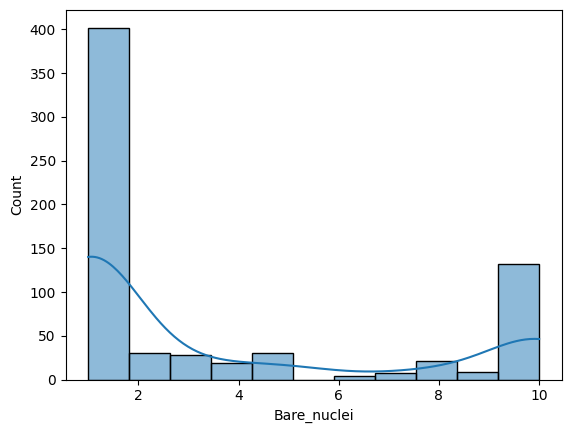

In [8]:
#visualize feature has missing value
sns.histplot(X["Bare_nuclei"], kde=True)


Fill the missing values with random values.

In [9]:
#random imputation
predictors = X.copy()
predictors["Bare_nuclei"] = predictors["Bare_nuclei"].apply(lambda x: np.random.choice(predictors["Bare_nuclei"].dropna().values) if pd.isnull(x) else x)



In [10]:
y.head()

,Class
0,2
1,2
2,2
3,2
4,2


In [11]:
y.describe().T

,count,mean,std,min,25%,50%,75%,max
Class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


In [12]:
y.isnull().sum()


Class    0
dtype: int64

In [13]:
y["Class"].unique()

array([2, 4], dtype=int64)

In [14]:
y["Class"].value_counts()

2    458
4    241
Name: Class, dtype: int64

target feature has two unique values which are "2" and "4" (Also it shows that there is no improper value in labels).
And it means  2 = benign, 4 = malignant.For clarification they converted to 1 and 0

In [15]:
y.loc[y['Class'] == 2, 'Class'] = 0
y.loc[y['Class'] == 4, 'Class'] = 1

C:\Users\NURŞAH SATILMIŞ\AppData\Local\Temp\ipykernel_9232\1771042565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[y['Class'] == 2, 'Class'] = 0
C:\Users\NURŞAH SATILMIŞ\AppData\Local\Temp\ipykernel_9232\1771042565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[y['Class'] == 4, 'Class'] = 1


##  Outlier Detection
* Choose an outlier detection method and apply it to the data.
* Explain your method and why you choose it.

In [16]:
import numpy as np
from scipy.stats import zscore, skew, kurtosis, shapiro
  
#Check if a given data array follows a normal distribution.
def is_normal(data, alpha=0.05):


    # Visual inspection, skewness, and kurtosis
    skewness = skew(data)
    kurt = kurtosis(data)

    # Shapiro-Wilk test (only if the data size is not too large)
    if len(data) <= 5000:
        _, p_value = shapiro(data)
        normality_test_passed = p_value > alpha
    else:
        normality_test_passed = True  # Skip Shapiro-Wilk test for large datasets

    return normality_test_passed, skewness, kurt
def z_score_transform(data):
    mean = np.mean(data)
    std = np.std(data)
    z_scores = (data - mean) / std
    return z_scores


def detect_outliers_IQR( frame ):
    Q1 = frame.quantile(0.25)
    Q3 = frame.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Return parameters for np.clip
    return lower_bound, upper_bound




In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
def box_plot (column):

        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 4))  # Adjust the number of rows and columns as needed
        # Flatten the axes array for easy iteration
        axes = axes.flatten()
        

        # Plot boxplot for the original dataframe 
        sns.boxplot(y=X[column], ax=axes[0])
        axes[0].set_title(f'Before outlier handling for {column}')
        axes[0].tick_params(axis='x', rotation=45)
        
        # Plot boxplot for the modified dataframe (cancer_data)
        sns.boxplot(y=predictors[column], ax=axes[1])
        axes[1].set_title(f'After outlier handling for {column}')
        axes[1].tick_params(axis='x', rotation=45)
        plt.tight_layout()
        plt.show()

Clump_thickness has not normal distrubition


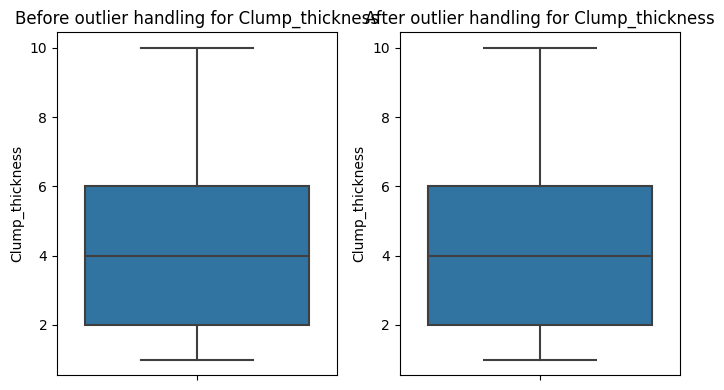

Uniformity_of_cell_size has not normal distrubition


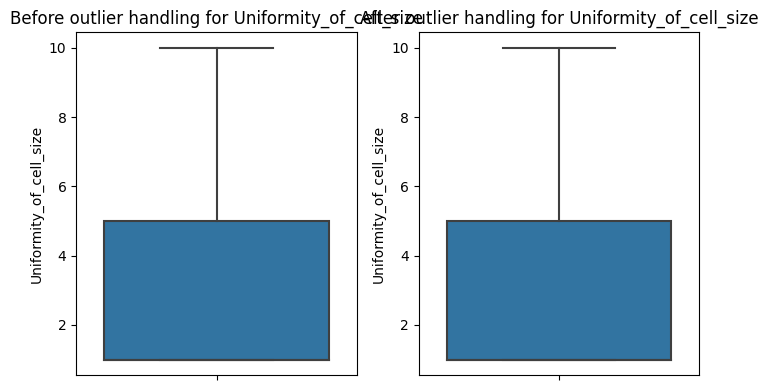

Uniformity_of_cell_shape has not normal distrubition


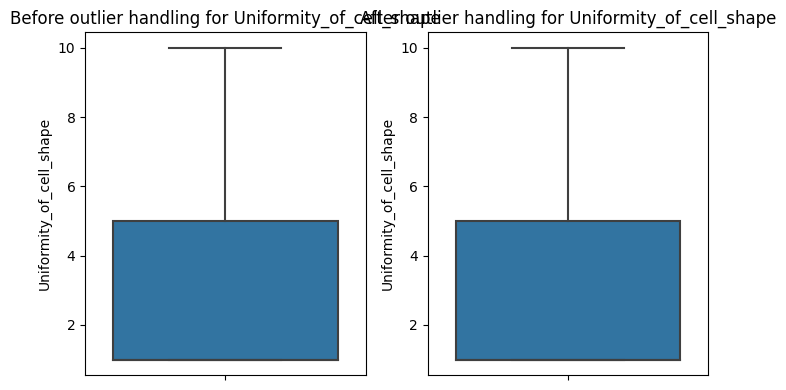

Marginal_adhesion has not normal distrubition


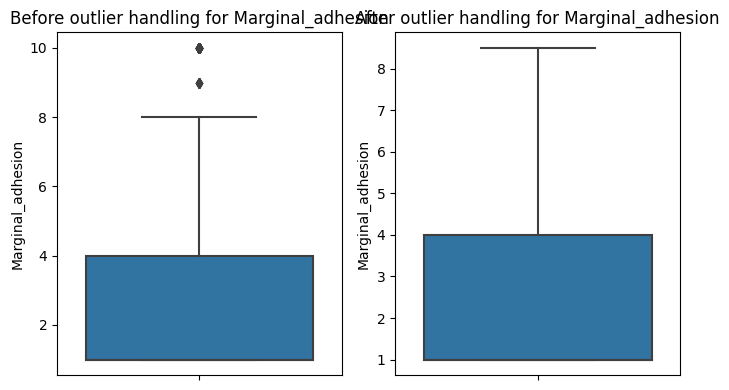

Single_epithelial_cell_size has not normal distrubition


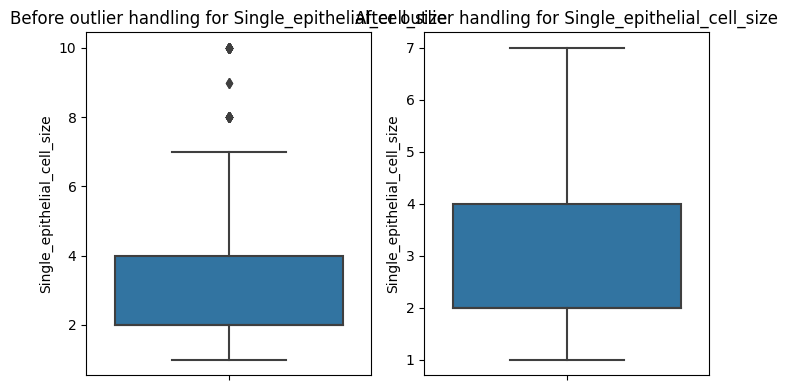

Bare_nuclei has not normal distrubition


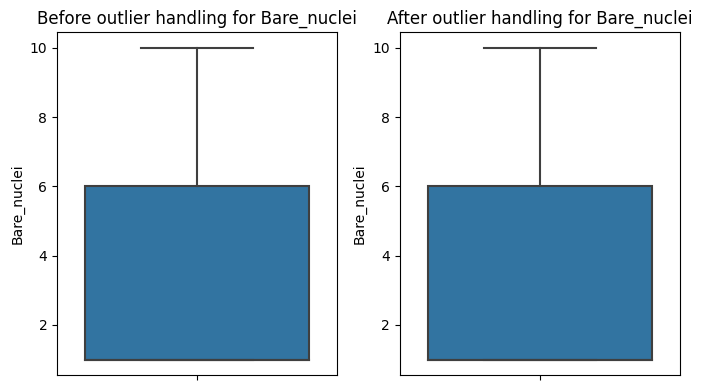

Bland_chromatin has not normal distrubition


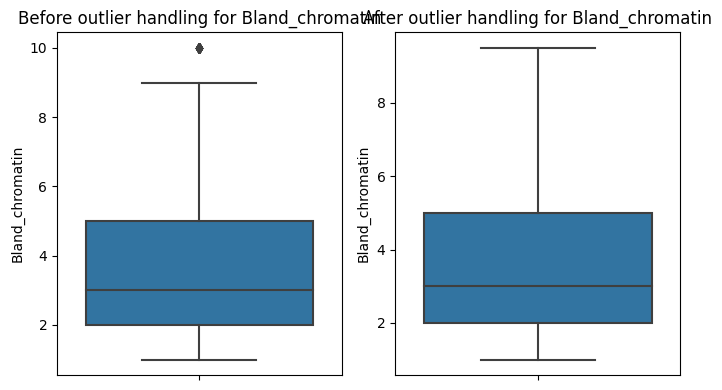

Normal_nucleoli has not normal distrubition


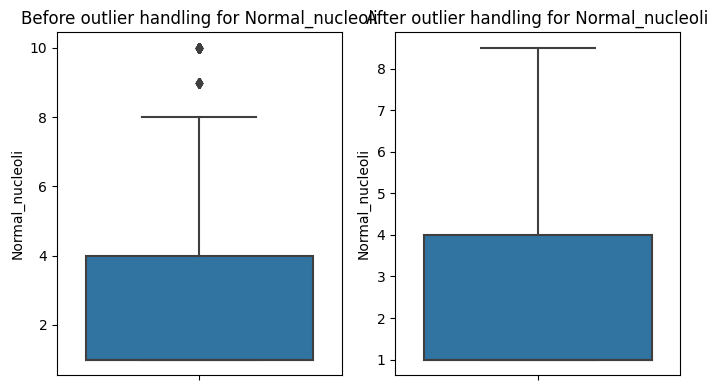

Mitoses has not normal distrubition


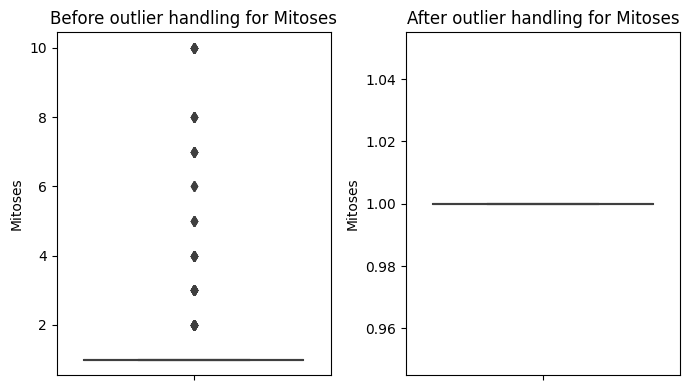

In [18]:
for columns in predictors.columns:
        normality_passed, skewness, kurt = is_normal(predictors[columns])


        if normality_passed: #Data is normally distributed. Applying z-score transformation.
            print(columns ,"has normal distrubition")
            z_scored_data = z_score_transform(predictors[columns])
            lower_bound, upper_bound = np.percentile(z_scored_data, [25, 75])
            predictors.loc[z_scored_data < lower_bound, columns] = lower_bound
            predictors.loc[z_scored_data > upper_bound, columns] = upper_bound
            box_plot(predictors[columns])
        
            
        else: #Data is not normally distributed.Apllying IQR. 
            print(columns ,"has not normal distrubition")
            lower_bound, upper_bound = detect_outliers_IQR(predictors[columns])
            # Apply clipping
            predictors.loc[predictors[columns] < lower_bound, columns] = lower_bound
            predictors.loc[predictors[columns] > upper_bound, columns] = upper_bound

           # print(len(cancer_data[columns]))
            box_plot(columns)


# Normalization


In [19]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
predictors = scaler.fit_transform(predictors)



## 2. Data Visualization

Visualize the data to understand it better:
- Correlation heatmap
- Distribution plots for at least 3 features


In [20]:
# combine predictors and the target for visualization
df = X.copy()
df['Class'] = y

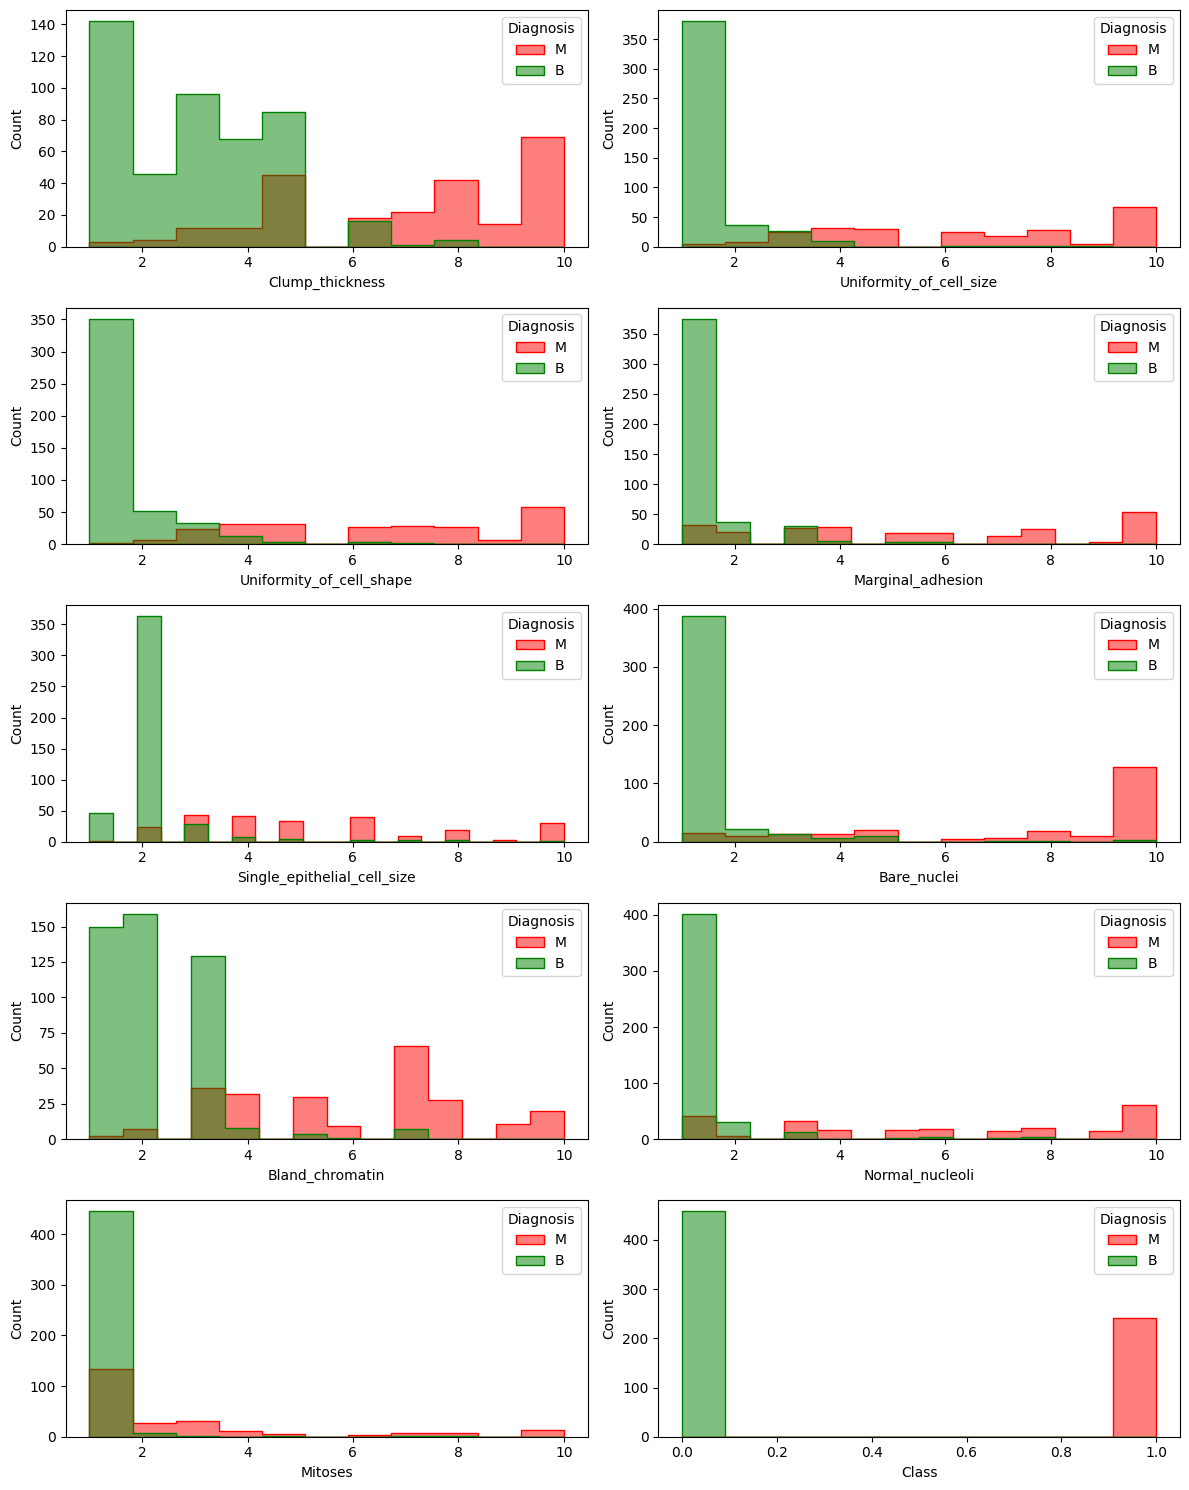

In [21]:

plt.figure(figsize=(12, 15))
for idx, feature in enumerate(df.columns):
    plt.subplot(5, 2, idx + 1)
    sns.histplot(data=df, x=feature, hue='Class', element='step', kde=False, palette=['green', 'red'], alpha=0.5)
    plt.legend(title='Diagnosis', loc='upper right', labels=['M', 'B'])

plt.tight_layout()
plt.show()


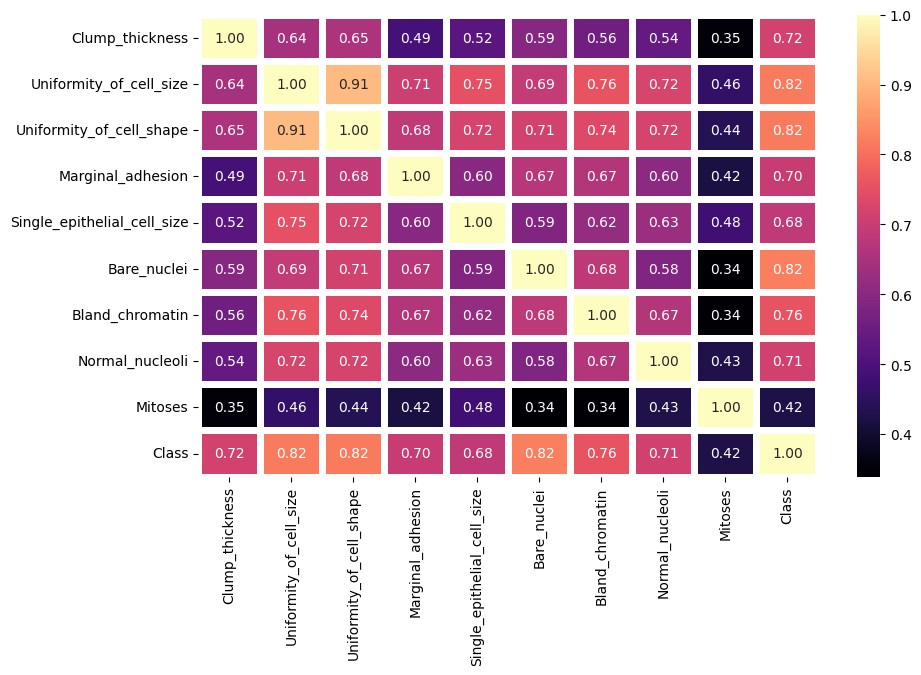

In [22]:
plt.figure(figsize=(10,6))

sns.heatmap(df.corr(),annot=True,cmap=plt.cm.magma,fmt=".2f",linewidths=5)
plt.show()

## 3. Data Splitting




In [23]:
X_train, X_test, y_train, y_test = train_test_split(predictors, y, test_size = 0.2, random_state = 42)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [24]:
print(X.shape,X_train.shape,X_test.shape)


(699, 9) (559, 9) (140, 9)


In [25]:
#plot learning curve to be sure models are not overfitted or underfitted.
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt




# XGBOOST Classification

In [26]:
xgb_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05]}
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)

In [27]:
xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [28]:
xgb_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.8}

In [29]:
xgb_model = XGBClassifier(**xgb_cv_model.best_params_)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)


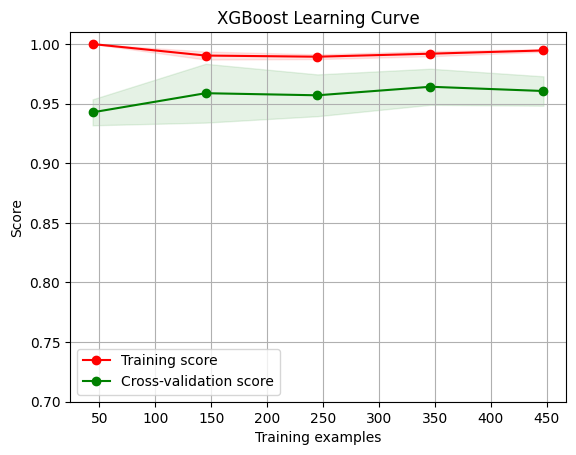

In [30]:
plot_learning_curve(xgb_model,"XGBoost Learning Curve",X_train,y_train,ylim=(0.7, 1.01))




plt.show()

# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


# Split the dataset into validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Define the hyperparameter grid
param_grid_log = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}


# Create the GridSearchCV object
grid_search_log = GridSearchCV(LogisticRegression(max_iter=5000), param_grid_log, cv=5)

# Fit the model
grid_search_log.fit(X_train, y_train)

# Get the best hyperparameters
best_params_log = grid_search_log.best_params_

# Evaluate the model
test_score_log = grid_search_log.score(X_test, y_test)

print(f"Best hyperparameters: {best_params_log}")
print(f"Test set score: {test_score_log}")


Best hyperparameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Test set score: 0.9714285714285714


In [32]:

log = LogisticRegression(**best_params_log)
log_model = log.fit(X_train,y_train)
y_prediction_log = log_model.predict(X_test)

In [33]:
accuracy_log= metrics.accuracy_score(y_prediction_log,y_test)
accuracy_log

0.9714285714285714

<module 'matplotlib.pyplot' from 'c:\\Users\\NURŞAH SATILMIŞ\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

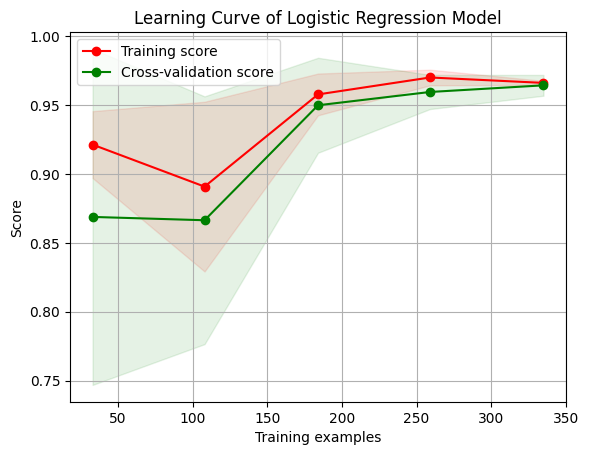

In [34]:
plot_learning_curve(log_model,"Learning Curve of Logistic Regression Model",X_train,y_train)

Model trained really good!

# Random Forest Classifier

In [35]:
rf = RandomForestClassifier()

# Define the grid of hyperparameters to search
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)

# Perform the grid search
grid_search_rf.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search_rf.best_params_)

# Evaluate the model on the test set
print("Test set accuracy:", grid_search_rf.score(X_test, y_test))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Test set accuracy: 0.9642857142857143


In [36]:
rand_for = RandomForestClassifier(**grid_search_rf.best_params_,criterion = 'entropy', random_state = 0)
rand_for.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=200, random_state=0)

In [37]:
y_pred_rf = rand_for.predict(X_test)
accuracy_rf= accuracy_score(y_pred_rf,y_test)
accuracy_rf


0.9714285714285714

<module 'matplotlib.pyplot' from 'c:\\Users\\NURŞAH SATILMIŞ\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

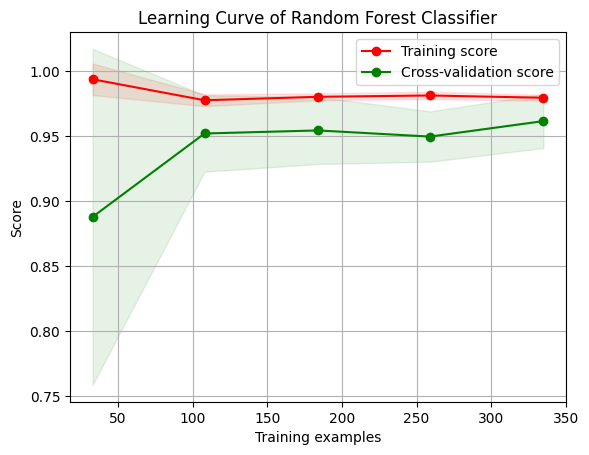

In [38]:
plot_learning_curve(rand_for,"Learning Curve of Random Forest Classifier",X_train,y_train)

# Support Vector Classification

In [39]:
param_grid_svc = {'C': [0.1, 1, 10, 100, 1000]}
grid_search_svc= GridSearchCV(estimator=SVC(kernel='linear', random_state=0),
                           param_grid=param_grid_svc,
                           cv=5,
                           n_jobs=-1)

# Perform the grid search
grid_search_svc.fit(X_train, y_train)

# Get the best parameters and best score
best_params_svc = grid_search_svc.best_params_
best_score_svc = grid_search_svc.best_score_

print("Best Parameters:", best_params_svc)
print("Best Score:", best_score_svc)

# Fit the model with the best parameters
best_SVC = SVC(probability=True,kernel='linear', random_state=0, **best_params_svc)
best_SVC.fit(X_train, y_train)

Best Parameters: {'C': 0.1}
Best Score: 0.9569707401032701


SVC(C=0.1, kernel='linear', probability=True, random_state=0)

In [40]:
y_pred_svc = best_SVC.predict(X_test)


<module 'matplotlib.pyplot' from 'c:\\Users\\NURŞAH SATILMIŞ\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

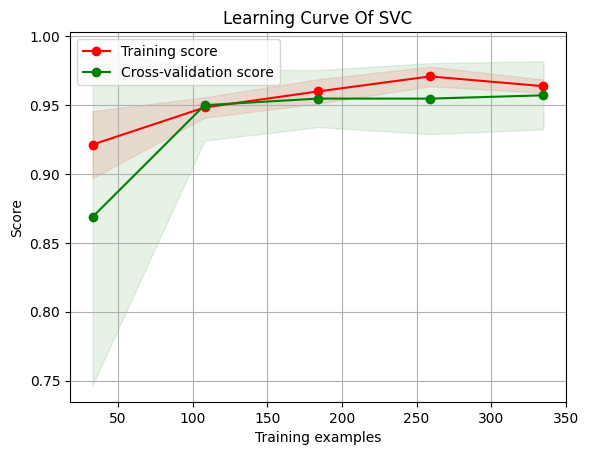

In [41]:
plot_learning_curve(best_SVC,"Learning Curve Of SVC",X_train,y_train)

# Neural Network Classificaiton

In [42]:
def create_model(layers, activation):
        model= Sequential()
        for i, nodes in enumerate(layers):
            if i==0:
                model.add(Dense(nodes, input_dim=X_train.shape[1]))
                model.add(Activation(activation))
            else:
                model.add(Dense(nodes))
                model.add(Activation(activation))
        model.add(Dense(1))
        
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model
    
model= KerasClassifier(model=create_model, verbose=0, activation='relu', layers=20)

In [43]:
X_train_, X_val, y_train_, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


layers=[[20],[40,20], [45, 30, 15]]
activations = ['sigmoid','relu']
param_grid = dict(layers=layers, activation=activations, batch_size=[128, 256], epochs=[30,50])
grid = GridSearchCV(estimator=model, param_grid=param_grid)

grid_result = grid.fit(X_train_, y_train_, validation_data=(X_val, y_val))
[grid_result.best_score_,grid_result.best_params_]

[0.9343283582089551,
 {'activation': 'relu', 'batch_size': 128, 'epochs': 30, 'layers': [20]}]

In [44]:
best_params = grid_result.best_params_

model_keras = create_model(layers=best_params['layers'], activation=best_params['activation'])
model_keras.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model_keras.fit(X_train, y_train, batch_size=best_params['batch_size'], epochs=best_params['epochs'], validation_data=(X_val, y_val))


# Evaluate the model
loss, accuracy = model_keras.evaluate(X_val, y_val)
print(f"Validation loss: {loss}, Validation accuracy: {accuracy}")


Epoch 1/30
4/4 [==============================] - 1s 105ms/step - loss: 5.5603 - accuracy: 0.6396 - val_loss: 5.6932 - val_accuracy: 0.6310
Epoch 2/30
4/4 [==============================] - 0s 24ms/step - loss: 5.5594 - accuracy: 0.6396 - val_loss: 5.6928 - val_accuracy: 0.6310
Epoch 3/30
4/4 [==============================] - 0s 22ms/step - loss: 5.5591 - accuracy: 0.6396 - val_loss: 5.6927 - val_accuracy: 0.6310
Epoch 4/30
4/4 [==============================] - 0s 21ms/step - loss: 5.5589 - accuracy: 0.6396 - val_loss: 5.6925 - val_accuracy: 0.6310
Epoch 5/30
4/4 [==============================] - 0s 21ms/step - loss: 5.5589 - accuracy: 0.6396 - val_loss: 5.6925 - val_accuracy: 0.6310
Epoch 6/30
4/4 [==============================] - 0s 22ms/step - loss: 5.5589 - accuracy: 0.6396 - val_loss: 5.6925 - val_accuracy: 0.6310
Epoch 7/30
4/4 [==============================] - 0s 23ms/step - loss: 5.5589 - accuracy: 0.6396 - val_loss: 5.6925 - val_accuracy: 0.6310
Epoch 8/30
4/4 [==========

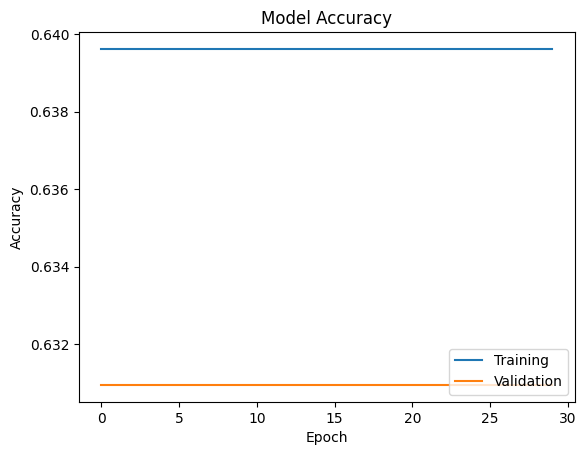

In [45]:

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()


In [46]:

y_pred_keras = model_keras.predict(X_test)

# Convert predictions to binary labels
y_pred__keras_binary = np.where(y_pred_keras >= 0, 1, 0)

# Calculate accuracy
accuracy_keras = accuracy_score(y_test, y_pred__keras_binary)
accuracy_keras


5/5 [==============================] - 0s 2ms/step


0.6785714285714286

# CATBOOST

In [47]:
catb_params = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.05, 0.1],
    'depth': [3,5,8] }

In [48]:
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, cv=5, n_jobs = -1, verbose = 2)
catb_cv_model.fit(X_train, y_train)
catb_cv_model.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
0:	learn: 0.6091107	total: 137ms	remaining: 27.3s
1:	learn: 0.5401691	total: 140ms	remaining: 13.8s
2:	learn: 0.4847801	total: 142ms	remaining: 9.31s
3:	learn: 0.4204179	total: 144ms	remaining: 7.07s
4:	learn: 0.3701995	total: 147ms	remaining: 5.74s
5:	learn: 0.3325736	total: 150ms	remaining: 4.85s
6:	learn: 0.2966595	total: 153ms	remaining: 4.21s
7:	learn: 0.2705387	total: 155ms	remaining: 3.72s
8:	learn: 0.2451588	total: 158ms	remaining: 3.35s
9:	learn: 0.2287432	total: 160ms	remaining: 3.04s
10:	learn: 0.2090241	total: 163ms	remaining: 2.8s
11:	learn: 0.1919796	total: 166ms	remaining: 2.6s
12:	learn: 0.1798912	total: 169ms	remaining: 2.42s
13:	learn: 0.1665684	total: 171ms	remaining: 2.27s
14:	learn: 0.1529930	total: 174ms	remaining: 2.15s
15:	learn: 0.1429441	total: 177ms	remaining: 2.03s
16:	learn: 0.1333446	total: 180ms	remaining: 1.93s
17:	learn: 0.1247458	total: 183ms	remaining: 1.85s
18:	learn: 0.1168226	total: 185ms

{'depth': 8, 'iterations': 200, 'learning_rate': 0.05}

In [49]:
catb = CatBoostClassifier(**catb_cv_model.best_params_)

catboost = catb.fit(X_train, y_train)
y_pred_cboost = catboost.predict(X_test)
accuracy_score(y_test, y_pred_cboost)

0:	learn: 0.6091107	total: 4.5ms	remaining: 895ms
1:	learn: 0.5401691	total: 7.01ms	remaining: 694ms
2:	learn: 0.4847801	total: 9.39ms	remaining: 617ms
3:	learn: 0.4204179	total: 11.8ms	remaining: 580ms
4:	learn: 0.3701995	total: 14.5ms	remaining: 564ms
5:	learn: 0.3325736	total: 16.8ms	remaining: 543ms
6:	learn: 0.2966595	total: 19.2ms	remaining: 530ms
7:	learn: 0.2705387	total: 21.6ms	remaining: 518ms
8:	learn: 0.2451588	total: 24.3ms	remaining: 517ms
9:	learn: 0.2287432	total: 26.8ms	remaining: 509ms
10:	learn: 0.2090241	total: 29.4ms	remaining: 504ms
11:	learn: 0.1919796	total: 32.1ms	remaining: 502ms
12:	learn: 0.1798912	total: 34.7ms	remaining: 499ms
13:	learn: 0.1665684	total: 37.4ms	remaining: 496ms
14:	learn: 0.1529930	total: 40.1ms	remaining: 495ms
15:	learn: 0.1429441	total: 42.6ms	remaining: 490ms
16:	learn: 0.1333446	total: 45.1ms	remaining: 486ms
17:	learn: 0.1247458	total: 47.8ms	remaining: 484ms
18:	learn: 0.1168226	total: 50.3ms	remaining: 479ms
19:	learn: 0.1102577	to

0.9714285714285714

0:	learn: 0.6121642	total: 2.04ms	remaining: 406ms
1:	learn: 0.5366060	total: 4.17ms	remaining: 413ms
2:	learn: 0.4650574	total: 5.8ms	remaining: 381ms
3:	learn: 0.4203990	total: 8.09ms	remaining: 396ms
4:	learn: 0.3716456	total: 9.83ms	remaining: 383ms
5:	learn: 0.3340585	total: 11.8ms	remaining: 381ms
6:	learn: 0.3067301	total: 13.8ms	remaining: 380ms
7:	learn: 0.2766662	total: 15.5ms	remaining: 373ms
8:	learn: 0.2501518	total: 17.3ms	remaining: 368ms
9:	learn: 0.2252815	total: 19.7ms	remaining: 374ms
10:	learn: 0.2017052	total: 21.6ms	remaining: 372ms
11:	learn: 0.1856345	total: 23.8ms	remaining: 372ms
12:	learn: 0.1663236	total: 25.7ms	remaining: 370ms
13:	learn: 0.1490417	total: 27.5ms	remaining: 366ms
14:	learn: 0.1328465	total: 29.1ms	remaining: 359ms
15:	learn: 0.1217792	total: 30.7ms	remaining: 353ms
16:	learn: 0.1105737	total: 32.5ms	remaining: 350ms
17:	learn: 0.1008404	total: 34.1ms	remaining: 345ms
18:	learn: 0.0961429	total: 36ms	remaining: 343ms
19:	learn: 0.0909579	tota

<module 'matplotlib.pyplot' from 'c:\\Users\\NURŞAH SATILMIŞ\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

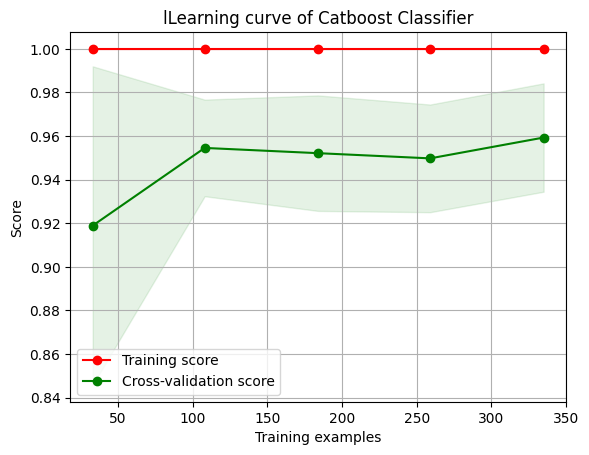

In [50]:
plot_learning_curve(catboost,"lLearning curve of Catboost Classifier",X_train,y_train)

 # EVALUATİON

Confusion Matrix

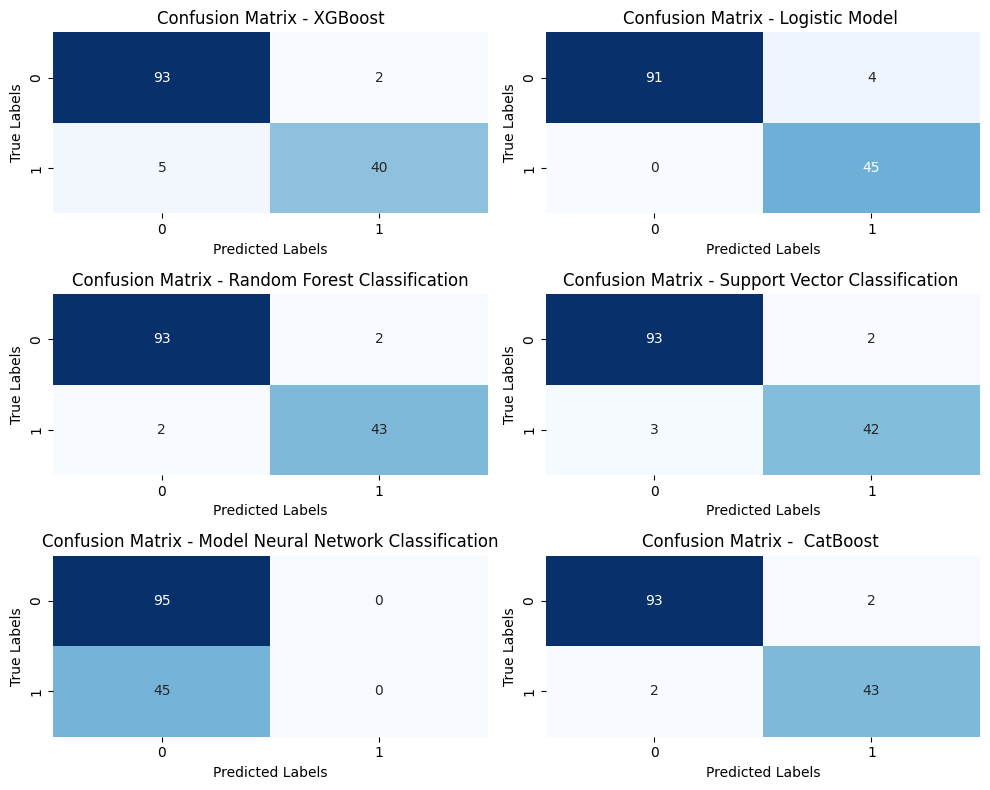

In [51]:
cm_xgb = confusion_matrix(y_test, y_pred=y_pred_xgb)
cm_log = confusion_matrix(y_test, y_pred=y_prediction_log)
cm_rf= confusion_matrix(y_test, y_pred=y_pred_rf)
cm_SVC= confusion_matrix(y_test, y_pred=y_pred_svc)
cm_keras= confusion_matrix(y_test, y_pred=y_pred__keras_binary)
cm_catb=confusion_matrix(y_test, y_pred=y_pred_cboost)

cms = [cm_xgb,cm_log , cm_rf, cm_SVC, cm_keras,cm_catb]
model_names = ["XGBoost","Logistic Model ", "Random Forest Classification", "Support Vector Classification ", "Model Neural Network Classification",  " CatBoost "]

plt.figure(figsize=(10, 8))
for i, (cm, model_name) in enumerate(zip(cms, model_names), 1):
    plt.subplot(3, 2, i)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")

plt.tight_layout()
plt.show()

In [52]:

# Displaying accuracy, precision, recall, and F1-score for both models
print("\nModel XGboost Classification Metrics:")
print(classification_report(y_test, y_pred_xgb, target_names=['Benign', 'Malignant']))

print("\nModel Logisitic Regression Metrics:")
print(classification_report(y_test, y_prediction_log, target_names=['Benign', 'Malignant']))

print("\nModel Random Forest Classification Metrics:")
print(classification_report(y_test, y_pred_rf, target_names=['Benign', 'Malignant']))

print("\nModel Support Vector Classification Metrics:")
print(classification_report(y_test, y_pred_svc, target_names=['Benign', 'Malignant']))

print("\nModel Neural Network Classification Metrics:")
print(classification_report(y_test, y_pred__keras_binary, target_names=['Benign', 'Malignant']))

print("\nModel CatBoost Metrics:")
print(classification_report(y_test, y_pred_cboost, target_names=['Benign', 'Malignant']))



Model XGboost Classification Metrics:
              precision    recall  f1-score   support

      Benign       0.95      0.98      0.96        95
   Malignant       0.95      0.89      0.92        45

    accuracy                           0.95       140
   macro avg       0.95      0.93      0.94       140
weighted avg       0.95      0.95      0.95       140


Model Logisitic Regression Metrics:
              precision    recall  f1-score   support

      Benign       1.00      0.96      0.98        95
   Malignant       0.92      1.00      0.96        45

    accuracy                           0.97       140
   macro avg       0.96      0.98      0.97       140
weighted avg       0.97      0.97      0.97       140


Model Random Forest Classification Metrics:
              precision    recall  f1-score   support

      Benign       0.98      0.98      0.98        95
   Malignant       0.96      0.96      0.96        45

    accuracy                           0.97       140
   macr

c:\Users\NURŞAH SATILMIŞ\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NURŞAH SATILMIŞ\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NURŞAH SATILMIŞ\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

0.95
0.9714285714285714
0.9714285714285714
0.9642857142857143
0.6785714285714286
0.9714285714285714


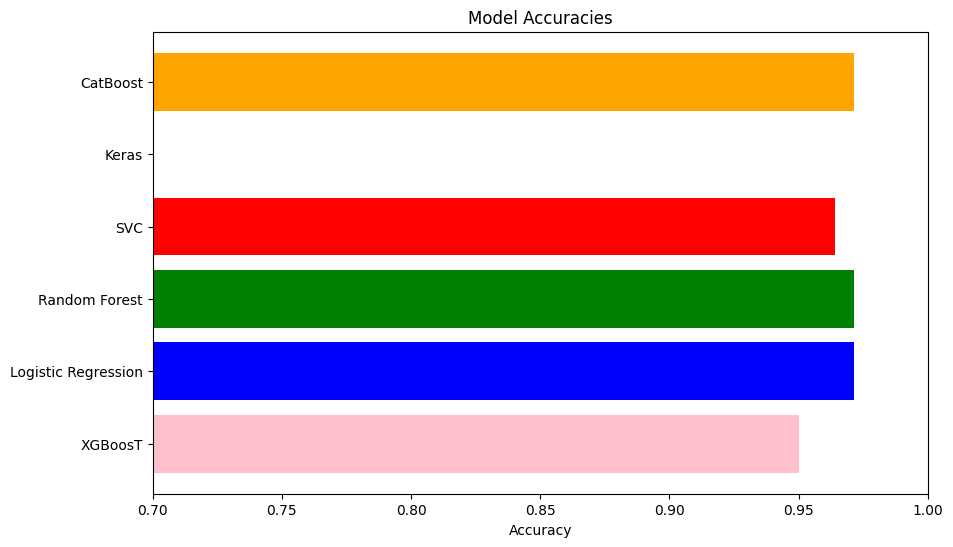

In [53]:
accuracy_xgb=accuracy_score(y_test, y_pred_xgb)
accuracy_log= accuracy_score(y_test, y_prediction_log)
accuracy_rf= accuracy_score(y_test, y_pred_rf)
accuracy_svc= accuracy_score(y_test, y_pred_svc)
accuracy_keras= accuracy_score(y_test, y_pred__keras_binary)
accuracy_catb = accuracy_score(y_test,y_pred_cboost)
models = ['XGBoosT','Logistic Regression', 'Random Forest', 'SVC', 'Keras','CatBoost']
accuracies = [accuracy_xgb,accuracy_log, accuracy_rf, accuracy_svc, accuracy_keras,accuracy_catb]
for accuracy in accuracies:
    print(accuracy)
plt.figure(figsize=(10, 6))
plt.barh(models, accuracies, color=['pink','blue', 'green', 'red', 'purple','orange'])
plt.xlim(0.7, 1.0)  # Set x-axis limits from 0.8 to 1.0 for better visualization
plt.xlabel('Accuracy')
plt.title('Model Accuracies')
plt.show()

### Precision -Recall Curves

5/5 [==============================] - 0s 2ms/step


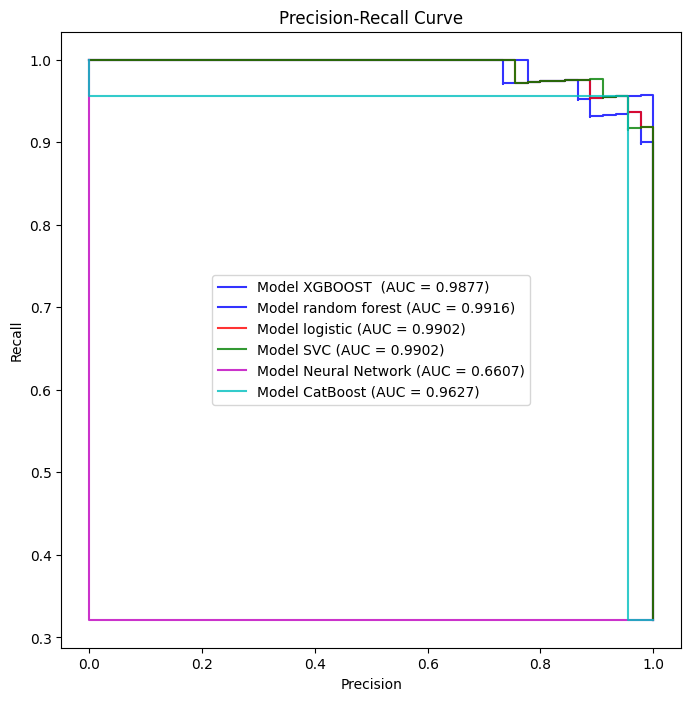

In [54]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
y_prob_xgb =xgb_model.predict_proba( np.ascontiguousarray(X_test))[:, 1]  # Probability of class 1
y_prob_rf =rand_for.predict_proba( np.ascontiguousarray(X_test))[:, 1]  # Probability of class 1
y_prob_log = log_model.predict_proba( np.ascontiguousarray(X_test))[:, 1]  # Probability of class 1
y_prob_svc=  best_SVC.predict_proba( np.ascontiguousarray(X_test))[:, 1]  # Probability of class 1
y_prob_keras = model_keras.predict(np.ascontiguousarray(X_test)) 
y_prob_catb = catboost.predict(np.ascontiguousarray(X_test))
plt.figure(figsize=(8, 8))

# Precision-Recall Curve for Model XGBoost
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_prob_xgb)
auc_xgb = auc(recall_xgb, precision_xgb)
plt.step(recall_xgb, precision_xgb, color='b', alpha=0.8, where='post', label=f'Model XGBOOST  (AUC = {auc_xgb:.4f})')


# Precision-Recall Curve for Model RF
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)
auc_rf = auc(recall_rf, precision_rf)
plt.step(recall_rf, precision_rf, color='b', alpha=0.8, where='post', label=f'Model random forest (AUC = {auc_rf:.4f})')

# Precision-Recall Curve for Model logistic
precision_log, recall_log, _ = precision_recall_curve(y_test, y_prob_log)
auc_log = auc(recall_log, precision_log)
plt.step(recall_log, precision_log, color='r', alpha=0.8, where='post', label=f'Model logistic (AUC = {auc_log:.4f})')


# Precision-Recall Curve for Model svc
precision_svc, recall_svc, _ = precision_recall_curve(y_test, y_prob_svc)
auc_svc = auc(recall_svc, precision_svc)
plt.step(recall_svc, precision_svc, color='g', alpha=0.8, where='post', label=f'Model SVC (AUC = {auc_svc:.4f})')


# Precision-Recall Curve for Model Neural Network 
precision_keras, recall_keras, _ = precision_recall_curve(y_test, y_pred__keras_binary)
auc_keras = auc(recall_keras, precision_keras)
plt.step(recall_keras, precision_keras, color='m', alpha=0.8, where='post', label=f'Model Neural Network (AUC = {auc_keras:.4f})')

# Precision-Recall Curve for Model CATBoost
precision_catboost, recall_catboost, _ = precision_recall_curve(y_test, y_pred_cboost)
auc_catboost = auc(recall_catboost, precision_catboost)
plt.step(recall_catboost, precision_catboost, color='c', alpha=0.8, where='post', label=f'Model CatBoost (AUC = {auc_catboost:.4f})')




plt.ylabel('Recall')
plt.xlabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()